In [0]:

import warnings; 
warnings.simplefilter('ignore')

In [22]:
pip install unidecode

     |████████████████████████████████| 245kB 6.4MB/s 


In [42]:
pip install pyLDAvis

     |████████████████████████████████| 1.6MB 8.5MB/s 
     |████████████████████████████████| 552kB 45.7MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=98ffc3dd21aa2b5ca66cfc36f5c06c28b0e21c0c755f69d93197c6b78023361f
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=17217238f60718a9c382345064bf656718c93fdf0d669a16dd6cfe2016f0795c
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [0]:
import pandas as pd


In [0]:
diretorio ='/content/tweets_@portalR7.csv'  

In [0]:
    data = pd.read_csv(diretorio, error_bad_lines=False);


In [7]:
data.head(2)

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
0,Mais de um terço de pacientes internados com C...,False,447,NaN,2020-05-16 03:00:00,True,NaN,1.261492e+18,NaN,"<a href=""https://about.twitter.com/products/tw...",g1,85.0,False,False,NaN,NaN
1,"Navio de cruzeiros atracado em Santos, SP, é l...",False,283,NaN,2020-05-16 02:45:00,False,NaN,1.261488e+18,NaN,"<a href=""https://about.twitter.com/products/tw...",g1,15.0,False,False,NaN,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786 entries, 0 to 785
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   text           786 non-null    object 
 1   favorited      782 non-null    object 
 2   favoriteCount  786 non-null    object 
 3   replyToSN      41 non-null     object 
 4   created        786 non-null    object 
 5   truncated      786 non-null    bool   
 6   replyToSID     35 non-null     object 
 7   id             782 non-null    float64
 8   replyToUID     37 non-null     float64
 9   statusSource   782 non-null    object 
 10  screenName     782 non-null    object 
 11  retweetCount   782 non-null    float64
 12  isRetweet      782 non-null    object 
 13  retweeted      782 non-null    object 
 14  longitude      0 non-null      float64
 15  latitude       0 non-null      float64
dtypes: bool(1), float64(5), object(10)
memory usage: 93.0+ KB


In [0]:

data_text = data[['text']]
data_text['index'] = data_text.index
documents = data_text

In [20]:
print(len(documents))
print(documents[:5])

786
                                                text  index
0  Mais de um terço de pacientes internados com C...      0
1  Navio de cruzeiros atracado em Santos, SP, é l...      1
2  Supostas citações a Witzel em investigação que...      2
3  Fernando de Noronha investiga cinco casos susp...      3
4  Só em 2020, a empresa recebeu R$ 129 milhões d...      4


In [0]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import nltk
import string
import unidecode
import pyLDAvis



In [12]:
# Retire o comentário apenas na primeira vez que executar esse notebook no seu ambiente
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('rslp')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [0]:
stopwords_pt = nltk.corpus.stopwords.words('portuguese')
custon_stop_words = ['nessa','todo','pra','vou','aqui','se','.',',','lá','vcs','""','"',':','globonews']

custon_stop_words = custon_stop_words +['veja','apos','sobre','globonews','anos','blog','dias','novo','contra','fazem','nesta','feira','sobre','cada'
,'quase','pode','hoje','durante','meio','defende','nesta']
punctuation = list(string.punctuation)
lista_stopwords  =list(set(stopwords_pt + punctuation + custon_stop_words+ ['rt', 'via'] ))



In [0]:
custon_stop_words

['nessa',
 'todo',
 'pra',
 'vou',
 'aqui',
 'se',
 '.',
 ',',
 'lá',
 'vcs',
 '""',
 '"',
 ':',
 'globonews',
 'veja',
 'apos',
 'sobre',
 'globonews',
 'anos',
 'blog',
 'dias',
 'novo',
 'contra',
 'fazem',
 'nesta',
 'feira',
 'sobre',
 'cada',
 'quase',
 'pode',
 'hoje',
 'durante',
 'meio',
 'defende',
 'nesta']

In [0]:
from nltk.stem.porter import *
stemmer = nltk.stem.RSLPStemmer()
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

In [0]:
def remove_caracteres_especiais(texto):
    punctuations = '''!()-![]{};:+'"\,<>./?@#$%^&*_~'''
    remove = ''.join([i for i in texto if not i in punctuations])
    remove_1 =  re.sub(r" ?\([^)]+\)", "", remove)
    remove_2 =''.join(remove_1).replace("'", " ")
    remove_3 =''.join(remove_2).replace("[", " ")
    remove_4 =''.join(remove_3).replace("]", " ")
    return str(remove_4)    

In [0]:
def isVogal(texto):
  vogais = ['a', 'e', 'i', 'o', 'u']
  temVogal =False
    
  for c in texto.lower():
    if c in vogais:
        temVogal = True
        break

  return temVogal;
  

In [0]:
def remove_url(txt):
    return re.sub(r'http\S+', '', txt)

In [0]:
from unidecode import unidecode
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
      palavra  = remove_url(token)
      palavra  = remove_caracteres_especiais(palavra)
      palavra = unidecode(palavra.lower())
      if palavra not in stopwords_pt and len(palavra) > 3:
        result.append(palavra) # Sem tratamentos
            # result.append(lemmatize_stemming(unidecode(token.lower()))) #Todas minúsculas, sem acentos e radical

    return result

In [0]:
# supporting function
def compute_coherence_values(corpus, dictionary, k):
    np.random.seed(2018)
    lda_model = gensim.models.LdaMulticore(corpus, num_topics=k, id2word=dictionary)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
    return coherence_model_lda.get_coherence()


In [33]:
doc_sample = documents[documents['index'] == 50].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['@ValdoCruz', '@gcamarotti', '#Pronunciamento', '-', "'A", 'vida', 'é', 'feita', 'de', 'escolhas.', 'E', 'hoje', 'eu', 'escolhi', "sair',", 'afirma', 'Nelson', 'Teich…', 'https://t.co/kQBM4XZgZX']


 tokenized and lemmatized document: 
['valdocruz', 'gcamarotti', 'pronunciamento', 'vida', 'feita', 'escolhas', 'hoje', 'escolhi', 'sair', 'afirma', 'nelson', 'teich', 'kqbm', 'xzgzx']


In [34]:
processed_docs = documents['text'].map(preprocess)
processed_docs[:10]

0    [terco, pacientes, internados, covid, apresent...
1    [navio, cruzeiros, atracado, santos, liberado,...
2    [supostas, citacoes, witzel, investigacao, pre...
3    [fernando, noronha, investiga, cinco, casos, s...
4    [empresa, recebeu, milhoes, governo, fluminens...
5    [tres, medicos, piloto, morrem, queda, aviao, ...
6    [mantem, escolas, fechadas, adia, pagamento, t...
7    [justica, condena, filho, mafia, capturados, f...
8    [argentina, desenvolve, teste, rapido, detecta...
9    [parque, animais, japao, reabre, publico, visi...
Name: text, dtype: object

In [35]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 20:
        break

0 apresentam
1 covid
2 internados
3 lesoes
4 pacientes
5 precisam
6 respirador
7 rins
8 terco
9 atracado
10 cruzeiros
11 liberado
12 navio
13 quarentena
14 santos
15 tvwywayleb
16 citacoes
17 enviadas
18 investigacao
19 mario
20 peixoto


In [36]:
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
corpus[100]

[(101, 1),
 (131, 1),
 (201, 1),
 (359, 1),
 (377, 1),
 (378, 1),
 (379, 1),
 (380, 1),
 (381, 1),
 (382, 1),
 (747, 1),
 (748, 1)]

In [37]:
bow_doc_100 = corpus[100]
for i in range(len(bow_doc_100)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_100[i][0], 
                                               dictionary[bow_doc_100[i][0]], bow_doc_100[i][1]))

Word 101 ("ministro") appears 1 time.
Word 131 ("saude") appears 1 time.
Word 201 ("apos") appears 1 time.
Word 359 ("teich") appears 1 time.
Word 377 ("anulado") appears 1 time.
Word 378 ("desgastado") appears 1 time.
Word 379 ("fritura") appears 1 time.
Word 380 ("isolado") appears 1 time.
Word 381 ("nelson") appears 1 time.
Word 382 ("oassunto") appears 1 time.
Word 747 ("assumir") appears 1 time.
Word 748 ("gbee") appears 1 time.


## estimativa de quantidade de modelos

In [61]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 8
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
model_results = {'Topics': [],
                 'Coherence': []
                }

pbar = tqdm.tqdm(total=len(topics_range))

for k in topics_range:

  cv = compute_coherence_values(corpus=corpus, dictionary=dictionary, k=k)
  model_results['Topics'].append(k)
  model_results['Coherence'].append(cv)
  pbar.update(1)
pbar.close()

100%|██████████| 6/6 [00:08<00:00,  1.36s/it]


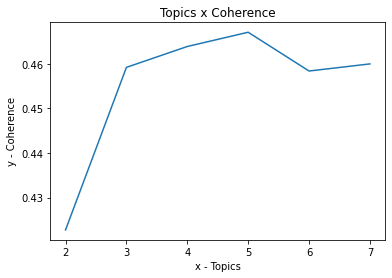

In [62]:
import matplotlib.pyplot as plt 

x = model_results['Topics']
y = model_results['Coherence']

plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - Topics') 
# naming the y axis 
plt.ylabel('y - Coherence') 
  
# giving a title to my graph 
plt.title('Topics x Coherence') 
  
# function to show the plot 
plt.show() 

## Primeiro modelo com 5 topicos

In [0]:
warnings.simplefilter('ignore')

np.random.seed(2018)
lda_model = gensim.models.LdaMulticore(corpus, num_topics=5, id2word=dictionary)

In [64]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.010*"covid" + 0.009*"bolsonaro" + 0.005*"pandemia" + 0.005*"apos" + 0.004*"coronavirus" + 0.004*"video" + 0.004*"anos" + 0.004*"sobre" + 0.004*"veja" + 0.004*"pais"
Topic: 1 
Words: 0.016*"coronavirus" + 0.009*"bolsonaro" + 0.007*"covid" + 0.006*"governo" + 0.005*"pandemia" + 0.005*"presidente" + 0.005*"mortes" + 0.005*"saude" + 0.005*"sobre" + 0.005*"apos"
Topic: 2 
Words: 0.009*"bolsonaro" + 0.007*"coronavirus" + 0.006*"covid" + 0.006*"brasil" + 0.005*"isolamento" + 0.005*"pandemia" + 0.005*"saude" + 0.004*"governo" + 0.004*"mortes" + 0.004*"veja"
Topic: 3 
Words: 0.013*"coronavirus" + 0.007*"mortes" + 0.007*"brasil" + 0.007*"veja" + 0.005*"covid" + 0.005*"anos" + 0.004*"segundo" + 0.004*"apos" + 0.004*"novo" + 0.004*"casos"
Topic: 4 
Words: 0.013*"coronavirus" + 0.007*"bolsonaro" + 0.007*"pandemia" + 0.007*"apos" + 0.006*"covid" + 0.006*"ministro" + 0.005*"isolamento" + 0.005*"anos" + 0.005*"video" + 0.005*"brasil"


In [65]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.020337  0.023408       1        1  22.553162
4      0.098816 -0.058161       2        1  20.808878
2     -0.025012 -0.033643       3        1  19.524439
0     -0.077825 -0.036364       4        1  19.221973
3      0.024359  0.104760       5        1  17.891548, topic_info=            Term       Freq      Total Category  logprob  loglift
29   coronavirus  89.000000  89.000000  Default  30.0000  30.0000
846      segundo   9.000000   9.000000  Default  29.0000  29.0000
771       vitima   7.000000   7.000000  Default  28.0000  28.0000
882         pede   8.000000   8.000000  Default  27.0000  27.0000
129   isolamento  27.000000  27.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
132       social   3.509222  14.085079   Topic5  -6.0131   0.3311
36       governo   4.015632  27.076977   Topic5  -5.8783  -0.1876
103        sobre   3.969695  29.670553   Topic5  -5.8898  -0.2906
305         pode   3.360789  12.717954   Topic5  -6.0563   0.3900
112         maio   3.361760  12.784976   Topic5  -6.0560   0.3850

[373 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1723      4  0.501323  acontecer
1724      4  0.501325      adiar
1079      1  0.968113   adotaram
763       1  0.136154      ajuda
763       3  0.272307      ajuda
...     ...       ...        ...
771       4  0.416631     vitima
771       5  0.555508     vitima
908       1  0.246303      volta
908       2  0.738910      volta
3346      4  0.501328    werneck

[596 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 3, 1, 4])

In [66]:
from gensim.models import CoherenceModel# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.46707559162293955


In [67]:
model_results

{'Coherence': [0.4227547019179222,
  0.45919924856865674,
  0.4638785297079835,
  0.46707559162293955,
  0.4583834600970221,
  0.4599756710618167],
 'Topics': [2, 3, 4, 5, 6, 7]}